# <center>Exploring NYC High Schools Perceptions</center>
## Table of Contents
* [1. Introduction](#introduction)
* [2. Ask](#ask)
* [3. Prepare](#prepare)
    * [3.1 Data used](#data_used)
    * [3.2 Loading packages](#loading)
    * [3.3 Importing the data](#importing)   
    * [3.4 Exploring the data](#exploring)
* [4. Process](#process)
    * [4.1 Removing duplicates](#remove_duplicates)
    * [4.2 Filtering survey data](#filtering)
    * [4.3 Combining survey data](#combining)
    * [4.4 Renaming columns](#renaming)
    * [4.5 Merging schools data with survey data](#merging)
* [5. Analyze and Share](#analyze)
    * [Question 1: Are survey scores related to academic success metrics?](#q1)
    * [Question 2: Do parents, students, and teachers have similar perceptions of NYC school quality?](#q2)
    * [Question 3: Are survey scores related to demographic metrics?](#q3)
* [6. Conclusion](#conclusion)

## <a id="introduction">1. Introduction</a>

This is a guided project in [Dataquest](https://app.dataquest.io/c/61/m/327/guided-project%3A-nyc-schools-perceptions/1/cleaning-and-analyzing-data-show-off-your-skills-and-start-building-a-portfolio), we'll be working with the NYC school data ([combined.csv](https://data.world/dataquest/nyc-schools-data/workspace/file?filename=combined.csv)) and school survey data (click [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)), to explore whether there are any interesting facts behind the survey data and whether it has any relation to academic success such as SAT scores.

This project focus on NYC high schools only.

## <a id="ask">2. Ask</a>

#### What is the task?
The goal of this project is to investigate the following questions:

- Do parents, students, and teachers perceptions of NYC school quality appear to be related to demographic and academic success metrics?
- Do parents, students, and teachers have similar perceptions of NYC school quality?

## <a id="prepare">3. Prepare</a>

### <a id="data_used">3.1 Data used</a>

#### Data source
The NYC school data was compiled from publicly available data provided by the [city of New York](https://opendata.cityofnewyork.us/data/). It has been cleaned up and uploaded by Dataquest, and can be downloaded from [here](https://data.world/dataquest/nyc-schools-data/workspace/file?filename=combined.csv).

The NYC school survey data is inside a zip file that can be downloaded from [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). We will analyze the 2 `.txt` files, `masterfile11_gened_final.txt` and `masterfile11_d75_final.txt`. The former is for all community schools, while the latter is for all [District 75 schools](https://teachnyc.zendesk.com/hc/en-us/articles/360044447211-What-are-District-75-schools-). We will combine them together and clean it up later. Additionally, we can also find `Survey_Data_Dictionary.xls` inside the zip folder that explains the columns of school survey data.

#### Accessibility and privacy
NYC Open Data contains information that is collected and maintained by the City government. We are free to download and analyze it in projects like this one, according to [Open Data Terms of Use](https://opendata.cityofnewyork.us/overview/#termsofuse).

### <a id="loading">3.2 Loading packages</a>

Make sure to install new packages before loading them, here we can skip the installation as it has been done before.

In [1]:
library(tidyverse)
library(ggplot2)

# make sure all columns are showing up
options(repr.matrix.max.cols = 100, repr.matrix.max.rows = 100)

# for clean output, quit the message showing the guessed column types 
options(readr.show_col_types = FALSE)

# set default theme options
theme_set(
  theme_void() + 
  theme(
    axis.title.y=element_text(angle = 90),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    strip.text = element_text(size = 14)
  )
)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### <a id="importing">3.3 Importing the data </a> 

Import the school data file `combined.csv`:

In [2]:
combined <- read_csv("combined.csv")

Import the survey data .txt files (`masterfile11_gened_final.txt` is the survey data of all community schools, `masterfile11_d75_final.txt` is the survey data of District 75 schools):

In [3]:
survey_all <- read_tsv("masterfile11_gened_final.txt")
survey_d75 <- read_tsv("masterfile11_d75_final.txt")

### <a id="exploring">3.4 Exploring the data</a> 

#### School data
First of all, let's check the school data.

In [4]:
# get the dimensions
dim(combined)

[1] 479  30

In [5]:
head(combined)

DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,2.5,NA,NA,NA,NA,23,88.6,422,22.3,24.9,35,14.0,29.1,53.8,1.7,61.4,38.6,78,55.1,14.1,Manhattan,40.71376,-73.98526
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39.0,49,10,1.256410,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.98480
01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,19.0,21,NA,1.105263,NA,21,71.8,598,5.0,26.4,19,9.7,23.9,55.4,10.4,54.7,45.3,90,77.8,5.6,Manhattan,40.72978,-73.98304
01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,2.5,NA,NA,NA,NA,23,72.8,224,4.0,8.9,0,2.2,34.4,59.4,3.6,43.3,56.7,NA,NA,NA,NA,NA,NA
01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,2.5,NA,NA,NA,NA,24,80.7,367,11.2,25.9,36,9.3,31.6,56.9,1.6,46.3,53.7,84,56.0,6.0,Manhattan,40.72057,-73.98567
01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316,1205,24.0,26,24,1.083333,92.30769,23,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,193,54.4,18.1,NA,NA,NA


Check if any column has `NA`:

In [6]:
print(colSums(is.na(combined)))

                                 DBN                          school_name 
                                   0                                    0 
              Num of SAT Test Takers      SAT Critical Reading Avg. Score 
                                  57                                   57 
                 SAT Math Avg. Score               SAT Writing Avg. Score 
                                  57                                   57 
                       avg_sat_score                       AP Test Takers 
                                  57                                    0 
                   Total Exams Taken Number of Exams with scores 3 4 or 5 
                                 247                                  328 
                   exams_per_student                   high_score_percent 
                                 247                                  328 
                      avg_class_size                          frl_percent 
                         

School identification code `DBN` has no NAs, which is good, we can ignore other missing values for now.

Next, let's check the survey data.

#### Survey data

In [7]:
# get the dimensions
dim(survey_all)

[1] 1646 1942

In [8]:
head(survey_all)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,p_q8d,p_q8e,p_q8f,p_q2b,p_q2d,p_q2e,p_q2f,p_q2g,p_q3a,p_q3b,⋯,s_N_q13b_3,s_N_q13b_4,s_N_q13c_1,s_N_q13c_2,s_N_q13c_3,s_N_q13c_4,s_N_q13d_1,s_N_q13d_2,s_N_q13d_3,s_N_q13d_4,s_N_q13e_1,s_N_q13e_2,s_N_q13e_3,s_N_q13e_4,s_N_q13f_1,s_N_q13f_2,s_N_q13f_3,s_N_q13f_4,s_N_q13g_1,s_N_q13g_2,s_N_q13g_3,s_N_q13g_4,s_N_q14a_1,s_N_q14a_2,s_N_q14a_3,s_N_q14a_4,s_N_q14b_1,s_N_q14b_2,s_N_q14b_3,s_N_q14b_4,s_N_q14c_1,s_N_q14c_2,s_N_q14c_3,s_N_q14c_4,s_N_q14d_1,s_N_q14d_2,s_N_q14d_3,s_N_q14d_4,s_N_q14e_1,s_N_q14e_2,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01M015,M015,P.S. 015 Roberto Clemente,0,No,0,Elementary School,NA,88,60,NA,22,90,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NA,NA,NA,NA,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,8.7,9.9,9.9,7.7,8.3,7.9,8.1,7.5,7.3,6.7,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M019,M019,P.S. 019 Asher Levy,0,No,0,Elementary School,NA,100,60,NA,34,161,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NA,NA,NA,NA,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,8.7,10.0,9.9,7.5,8.2,7.9,8.0,7.2,7.0,6.9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M020,M020,P.S. 020 Anna Silver,0,No,0,Elementary School,NA,88,73,NA,42,367,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NA,NA,NA,NA,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,9.2,9.8,9.7,8.4,8.8,8.5,8.3,8.0,7.6,7.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,89,73,50,145,29,151,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,9.1,9.8,9.7,8.3,8.7,8.3,8.1,7.6,7.6,7.5,⋯,19,16,24,74,20,24,21,50,26,45,76,35,14,17,100,30,6,4,89,28,9,12,32,68,21,16,23,60,32,25,43,66,19,12,39,68,18,16,35,70,20,16,23,54,33,29,31,46,16,8
01M063,M063,P.S. 063 William McKinley,0,No,0,Elementary School,NA,100,60,NA,23,90,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NA,NA,NA,NA,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,9.4,10.0,10.0,7.6,8.5,8.0,8.2,7.4,7.8,7.2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M064,M064,P.S. 064 Robert Simon,0,No,0,Elementary School,NA,94,61,NA,32,159,0,34,262,8.8,8.2,8.2,8.5,8.6,7.6,8.3,8.5,NA,NA,NA,NA,8.7,7.9,8.2,8.5,8.3,8.8,8.6,8.4,8.5,7.3,8.9,9.3,9.4,9.9,9.9,8.4,8.7,8.6,8.3,7.8,7.8,7.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see `schooltype` column has value "Elementary School", it's a potential issue since we only care about high schools, let's check all the unique values in that column:

In [9]:
print(unique(survey_all$schooltype))

[1] "Elementary School"                 "Elementary / Middle School"       
[3] "Middle / High School"              "Middle School"                    
[5] "High School"                       "Elementary / Middle / High School"
[7] "Early Childhood School"            "YABC"                             


It does have "High School", we will ignore types like "Elementary / Middle / High School", since it's not guaranteed to be the survey result of high schools.

Similarly, let's check `survey_d75`.

In [10]:
# check its dimensions
dim(survey_d75)

[1]   56 1773

In [11]:
# check the first 6 rows
head(survey_d75)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q1c,p_q10a,p_q10b,p_q10c,p_q10d,p_q10e,p_q10f,p_q11a,p_q11b,p_q11c,p_q11d,p_q11e,p_q1b,p_q1e,p_q1f,p_q2a,p_q2b,p_q3c,⋯,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q13a_1,s_q13a_2,s_q13a_3,s_q13a_4,s_q13b_1,s_q13b_2,s_q13b_3,s_q13b_4,s_q13c_1,s_q13c_2,s_q13c_3,s_q13c_4,s_q13d_1,s_q13d_2,s_q13d_3,s_q13d_4,s_q13e_1,s_q13e_2,s_q13e_3,s_q13e_4,s_q13f_1,s_q13f_2,s_q13f_3,s_q13f_4,s_q13g_1,s_q13g_2,s_q13g_3,s_q13g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,38,90,72,8,81,244,21,90,337,9.1,8.6,8.4,8.5,7.4,6.6,6.4,6.4,7.6,5.8,7.6,6.3,8.0,7.0,7.5,7.1,8.7,9.0,9.0,8.9,8.8,8.9,8.9,7.3,9.7,9.7,9.9,9.9,8.6,8.4,9.0,9.0,8.6,8.0,⋯,0,0,0,100,0,0,0,100,0,0,0,0,100,0,0,14,86,0,0,14,86,0,0,0,86,14,0,0,100,0,0,0,100,0,0,0,100,0,0,71,29,0,0,0,0,0,0,0,0,0
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,70,69,44,97,43,115,139,62,263,9.2,8.7,8.6,8.8,6.9,7.1,6.1,7.2,6.6,6.9,7.3,7.7,7.5,7.6,7.3,7.9,8.8,9.3,9.2,9.0,9.1,9.3,9.2,7.6,9.7,8.8,10.0,9.8,9.2,9.0,9.1,8.4,8.0,8.5,⋯,32,13,10,68,20,4,8,54,22,13,10,46,43,7,4,42,39,17,2,52,39,4,4,41,40,12,7,42,31,19,8,37,38,12,12,35,47,10,8,13,20,27,19,9,2,6,1,2,0,0
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,94,97,53,131,75,189,139,77,355,8.8,8.1,8.0,8.1,7.8,7.5,6.9,8.0,8.2,7.7,8.6,8.5,8.2,7.8,7.8,8.2,8.3,8.6,8.8,8.4,8.6,8.7,8.4,7.3,9.6,9.0,9.7,9.7,8.1,7.9,8.5,7.8,7.3,7.9,⋯,14,3,3,96,4,0,0,89,10,0,1,52,39,8,1,53,40,5,2,70,26,4,0,66,29,4,1,63,35,2,0,50,33,13,4,58,41,1,1,5,14,12,12,10,21,13,11,2,0,0
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,95,65,55,70,52,150,74,80,274,9.4,8.7,8.8,8.9,7.1,6.2,6.4,6.3,8.6,8.3,8.6,8.8,8.3,7.7,7.9,8.0,8.8,9.2,9.2,9.1,9.1,9.1,8.9,9.5,10.0,9.9,10.0,10.0,9.0,8.7,8.9,8.8,8.0,8.7,⋯,7,0,3,96,1,3,0,97,0,0,3,54,43,1,1,55,36,7,1,59,38,1,1,57,35,4,4,61,36,1,1,56,34,7,3,64,33,1,1,3,14,14,7,11,16,10,6,4,7,7
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,77,70,42,69,45,117,90,64,277,8.6,8.2,7.9,8.3,5.6,5.8,5.1,6.0,4.7,6.1,6.0,7.3,6.3,6.7,6.3,7.2,8.8,8.6,8.8,8.4,8.4,8.5,8.6,6.4,9.1,8.5,9.9,9.1,8.8,8.6,8.8,7.7,7.1,8.0,⋯,22,17,39,33,48,10,10,16,38,11,34,18,62,5,15,23,27,17,33,34,25,31,11,17,14,42,28,18,11,34,37,6,22,25,48,19,25,22,34,12,35,34,17,2,0,0,0,0,0,0
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,73,55,29,53,43,105,73,78,364,8.8,8.0,7.9,8.0,6.0,4.8,4.9,5.1,6.1,6.2,7.3,7.6,6.9,6.3,6.7,6.9,8.3,8.5,8.7,8.2,8.3,8.6,8.6,7.3,9.8,9.1,9.8,9.7,8.0,8.0,8.6,8.1,7.7,7.7,⋯,24,14,10,69,6,14,10,42,22,12,24,49,27,14,10,29,24,31,16,52,20,16,12,52,27,10,10,45,27,20,8,22,39,14,24,53,20,10,16,12,26,34,26,0,0,0,2,0,0,0


And its schooltype:

In [12]:
print(unique(survey_d75$schooltype))

[1] "District 75 Special Education"


The survey data has 2 issues. The first issue is that in `survey_all`, column `schooltype` contains high schools data like "Elementary School". While in `survey_d75`, column `schooltype` has unique value "District 75 Special Education", we don't know if it's a high school or not, so just leave it as it is.
The other issue is both survey data frames are so "wide", most of the variable columns in these data frames provide granular information about survey responses. For example, the variable s_q1a_1 contains, for each school, the number of students (indicated by "s") that responded to "option 1" of "question 1a."

Here we will mainly focus on the aggregate scores variables start with `saf_`, `com_`, `eng` and `aca_`, they are 4 types of survey questions:

* **saf**: Safety and Respect
* **com**: Communication
* **eng**: Engagement
* **aca**: Academic Expectations

and the character right after the metric (e.g., `p` right after `saf_p`) indicates the responder group that responded to the survey, there are 4 groups:

* **p**: Parents
* **t**: Teachers
* **s**: Students
* **tot**: Total (The average of parent, teacher, and student scores)

In summary, we are going to focus on the following 16 metrics:

* `saf_p_11`
* `saf_t_11`
* `saf_s_11`
* `saf_tot_11`
* `com_p_11`
* `com_t_11`
* `com_s_11`
* `com_tot_11`
* `eng_p_11`
* `eng_t_11`
* `eng_s_11`
* `eng_tot_11`
* `aca_p_11`
* `aca_t_11`
* `aca_s_11`
* `aca_tot_11`


## <a id="process">4. Process</a>

### <a id="remove_duplicates">4.1 Removing duplicates</a>

As the school's identification code in `survey_all` and `survey_d75`, `dbn` should be unique.

In [13]:
survey_all <- survey_all %>% 
  distinct(dbn, .keep_all = TRUE)

survey_d75 <- survey_d75 %>% 
  distinct(dbn, .keep_all = TRUE)

### <a id="filtering">4.2 Filtering survey data</a>
We need to filter `survey_all` and `survey_d75` with above selected columns.

In [14]:
survey_all_filtered <- survey_all %>%
  filter(schooltype == "High School") %>%
  select(dbn:aca_tot_11)

In [15]:
survey_d75_filtered <- survey_d75 %>%       
  select(dbn:aca_tot_11)

### <a id="combing">4.3 Combining survey data</a>

We will eventually need to join the survey data with schools data, so it's more convenient if we combine these 2 survey data frames together:

In [16]:
survey_total <- survey_all_filtered %>% 
  bind_rows(survey_d75_filtered)

### <a id="renaming">4.4 Renaming columns</a>

After comparing `survey_total` with `combined`, we can find the key to join them is the school code, i.e., column `dbn` in `survey_total`, `DBN` in `combined`. So we need to rename that column:

In [17]:
survey_total <- survey_total %>%
  rename(DBN = dbn)

### <a id="merging">4.5 Merging schools data with survey data</a>

Here we can left join `combined` with `survey_total`, because we care about the school performance and curious about how it behaves without any survey data.

In [18]:
combined_survey <- combined %>%
  left_join(survey_total, by = "DBN")

Now we already have a combined data frame to work with, let's start our analysis and create visualizations.

## <a id="analyze">5. Analyze and Share</a>

### <a id="q1">Question 1: Are survey scores related to academic success metrics?</a>

To answer this question, we can select `grads_percent`, `dropout_percent` and `avg_sat_score` as academic metrics. We need to create a correlation matrix to look for relationships between pairs of variables in `combined_survey`, then convert it to a tibble.

Compute correlation coefficient:

In [19]:
cor_mat <- combined_survey %>%
  select(grads_percent, dropout_percent, avg_sat_score, saf_p_11:aca_tot_11) %>%
  cor(use = "pairwise.complete.obs")

cor_tib <- cor_mat %>%
  as_tibble(rownames = "variable")

When correlations have absolute value smaller than 0.25, the relationships are negligible, so we only care about whose absolute value is larger than 0.25.

In [20]:
significant_cors <- cor_tib %>%
  select(variable, grads_percent, dropout_percent, avg_sat_score) %>%
  filter(!(variable %in% c("grads_percent", "dropout_percent", "avg_sat_score"))) %>%
  filter(abs(grads_percent) > 0.25 | abs(dropout_percent) > 0.25 | abs(avg_sat_score) > 0.25)

significant_cors

variable,grads_percent,dropout_percent,avg_sat_score
<chr>,<dbl>,<dbl>,<dbl>
saf_t_11,0.14961402,-0.2350117,0.3091444
saf_s_11,-0.09632565,-0.1689189,0.2772681
aca_s_11,-0.05929997,-0.2133157,0.2925880
saf_tot_11,0.01169939,-0.2409769,0.2760410


It turns out `saf_t_11`, `saf_s_11`, `saf_tot_11`, `aca_s_11` have **weak** positive relationships with SAT scores, but have little relationships with grads_percent and dropout_percent.

Let's create scatter plots to view their relationships with SAT scores more clearly, before that, we need to convert `combined_survey` to long data and remove the rows whose score value is `NA`.

In [21]:
combined_survey_long <- combined_survey %>% 
  pivot_longer(
    cols = saf_p_11:aca_tot_11,
    names_to = "survey_scores_column",
    values_to = "survey_scores_value"
  ) %>% 
  filter(!is.na(survey_scores_value))

head(combined_survey_long)

DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,survey_scores_column,survey_scores_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,saf_p_11,7.9
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,com_p_11,7.4
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,eng_p_11,7.2
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,aca_p_11,7.3
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,saf_t_11,6.6
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39,49,10,1.25641,20.40816,22,71.8,394,21.1,21.8,10,29.2,22.6,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.9848,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,385,37,46,459,39,445,com_t_11,5.8


Create data visualization:

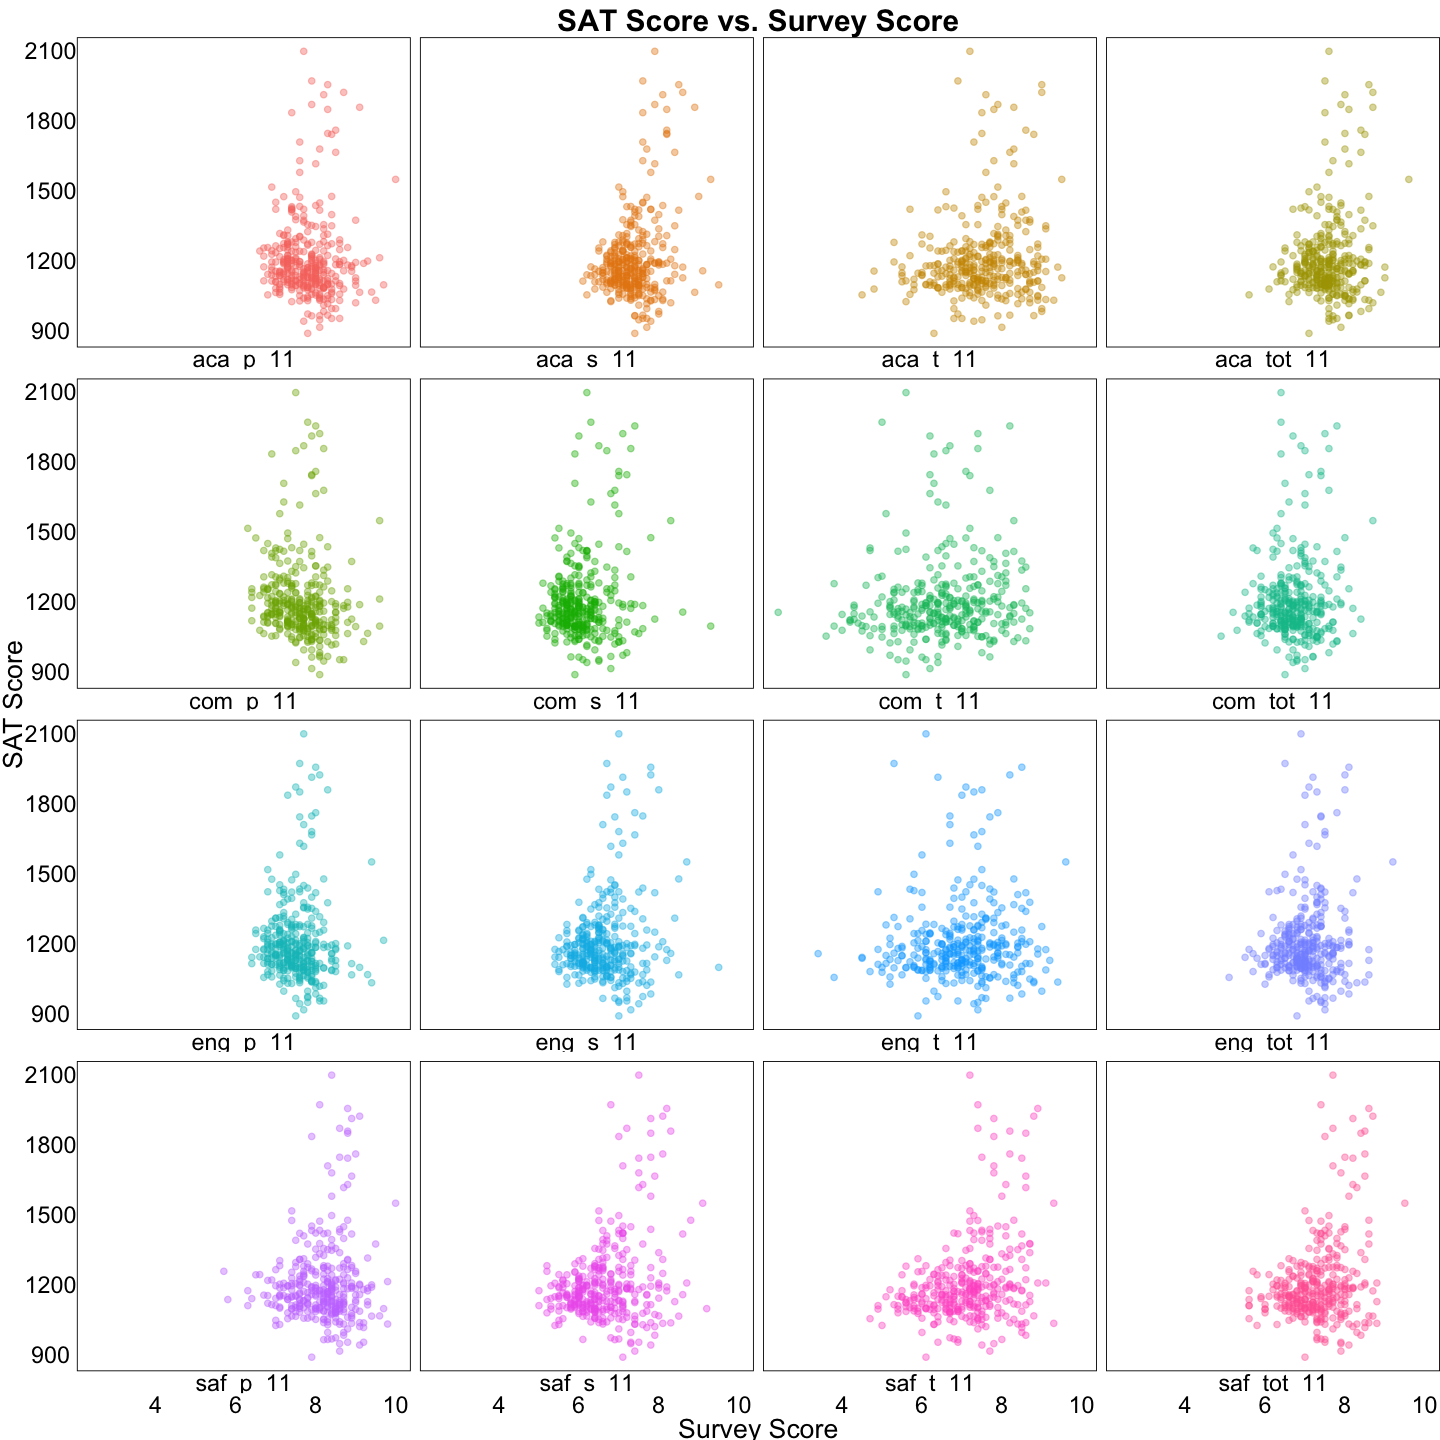

In [22]:
options(repr.plot.width = 12, repr.plot.height = 12)

combined_survey_long %>%
  filter(!is.na(avg_sat_score)) %>% 
  ggplot(aes(x = survey_scores_value, y = avg_sat_score, color = survey_scores_column)) +
  geom_point(alpha = 0.4) +
  facet_wrap(
    vars(survey_scores_column),
    nrow = 4,
    strip.position = "bottom"
  ) +
  theme(
    legend.position = "none",
    panel.border = element_rect(color = "black", fill = NA, size = .5)
  ) +
  labs(
    title = "SAT Score vs. Survey Score",
    x = "Survey Score",
    y = "SAT Score"
  )

As we can see from the above plot, it's hard to conclude `saf_t_11`, `saf_s_11`, `saf_tot_11`, `aca_s_11` have **weak** relationships with SAT scores without computing the correlation coefficient, but we can still find some interesting relationships. Survey scores from teachers have wider range, the lowest scores are probably from teachers. Parents tend to give higher scores, while students are in between. Is the observation correct? Let's investigate further in the following question.


### <a id="q2">Question 2: Do parents, students, and teachers have similar perceptions of NYC school quality?</a>

In Questions 1, we've found there appear to be some differences in student, parent, and teacher responses to survey questions, let's take a closer look at that issue. First of all, we will need to extract the question type and responder type from column `survey_scores_column`.

In [23]:
combined_survey_long <- combined_survey_long %>%
  mutate(question = str_sub(survey_scores_column, 1, 3)) %>%   
  mutate(responder = str_sub(survey_scores_column, 4, 6))

Then convert the abbreviation to its corresponding full name to make it more readable.

In [24]:
combined_survey_long <- combined_survey_long %>%
  mutate(
    question = case_when(
      question == "saf" ~ "Safety and Respect",
      question == "com" ~ "Communication",
      question == "eng" ~ "Engagement",
      question =="aca" ~ "Academic Expectations",
      TRUE ~ question
    ),
    responder = case_when(
      responder == "_s_" ~ "Student",
      responder == "_p_" ~ "Parent",
      responder == "_t_" ~ "Teacher",
      responder == "_to" ~ "Total",
      TRUE ~ responder
    )
  )

Create a boxplot to see if there is any difference in how the three groups of responders (students, parents and teachers) answered the four types of questions.


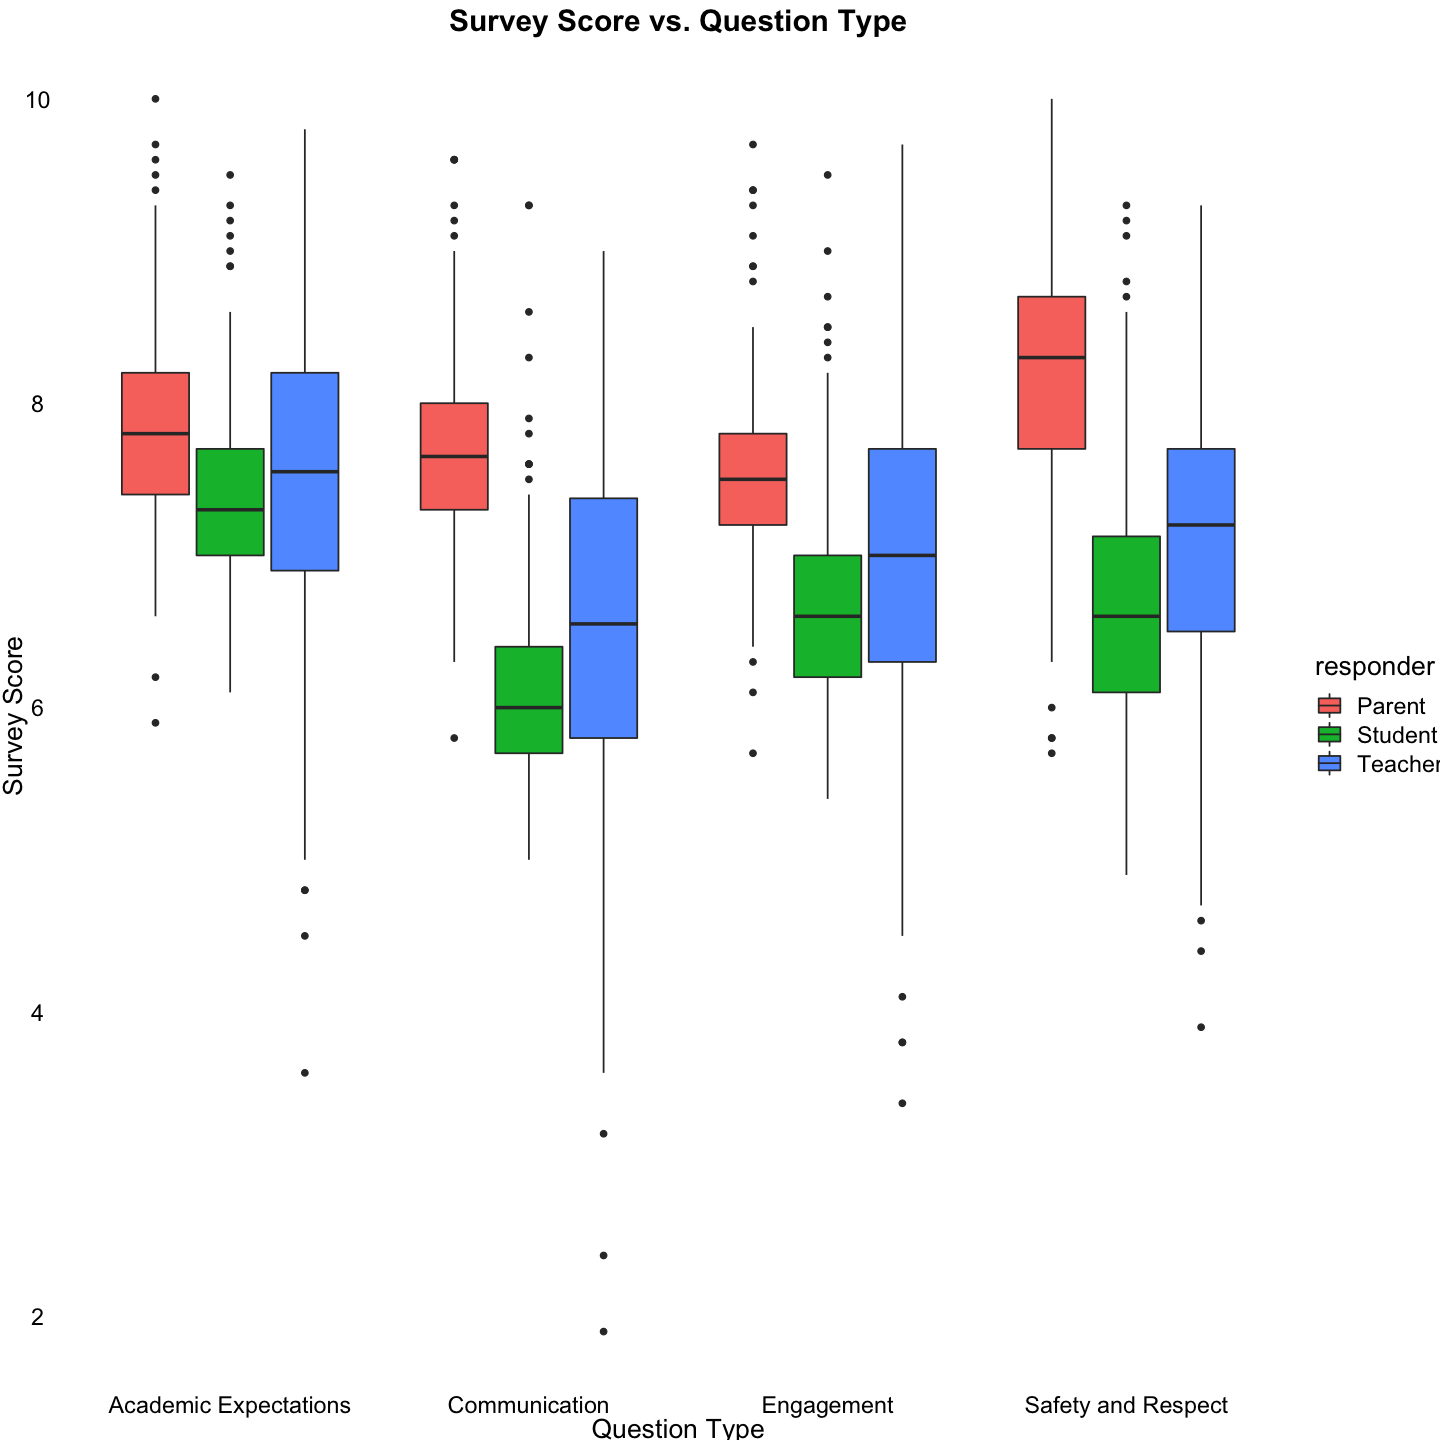

In [25]:
combined_survey_long %>%
  filter(responder != "Total") %>%
  ggplot(aes(x = question, y = survey_scores_value, fill = responder)) +
  geom_boxplot() +
  labs(
    title = "Survey Score vs. Question Type",
    x = "Question Type",
    y = "Survey Score"
  )

Based on above boxplot, we can confirm that parents did tend to give higher scores then the other 2 groups, but scores from students are not in the middle, most students tend to give lower scores than teachers. As for teachers, their scores are more spread out, even though most of them give middle scores, the lowest scores are always from them.

### <a id="q3">Question 3: Are survey scores related to demographic metrics?</a>

#### Location

First of all, let's check location (`boro`):

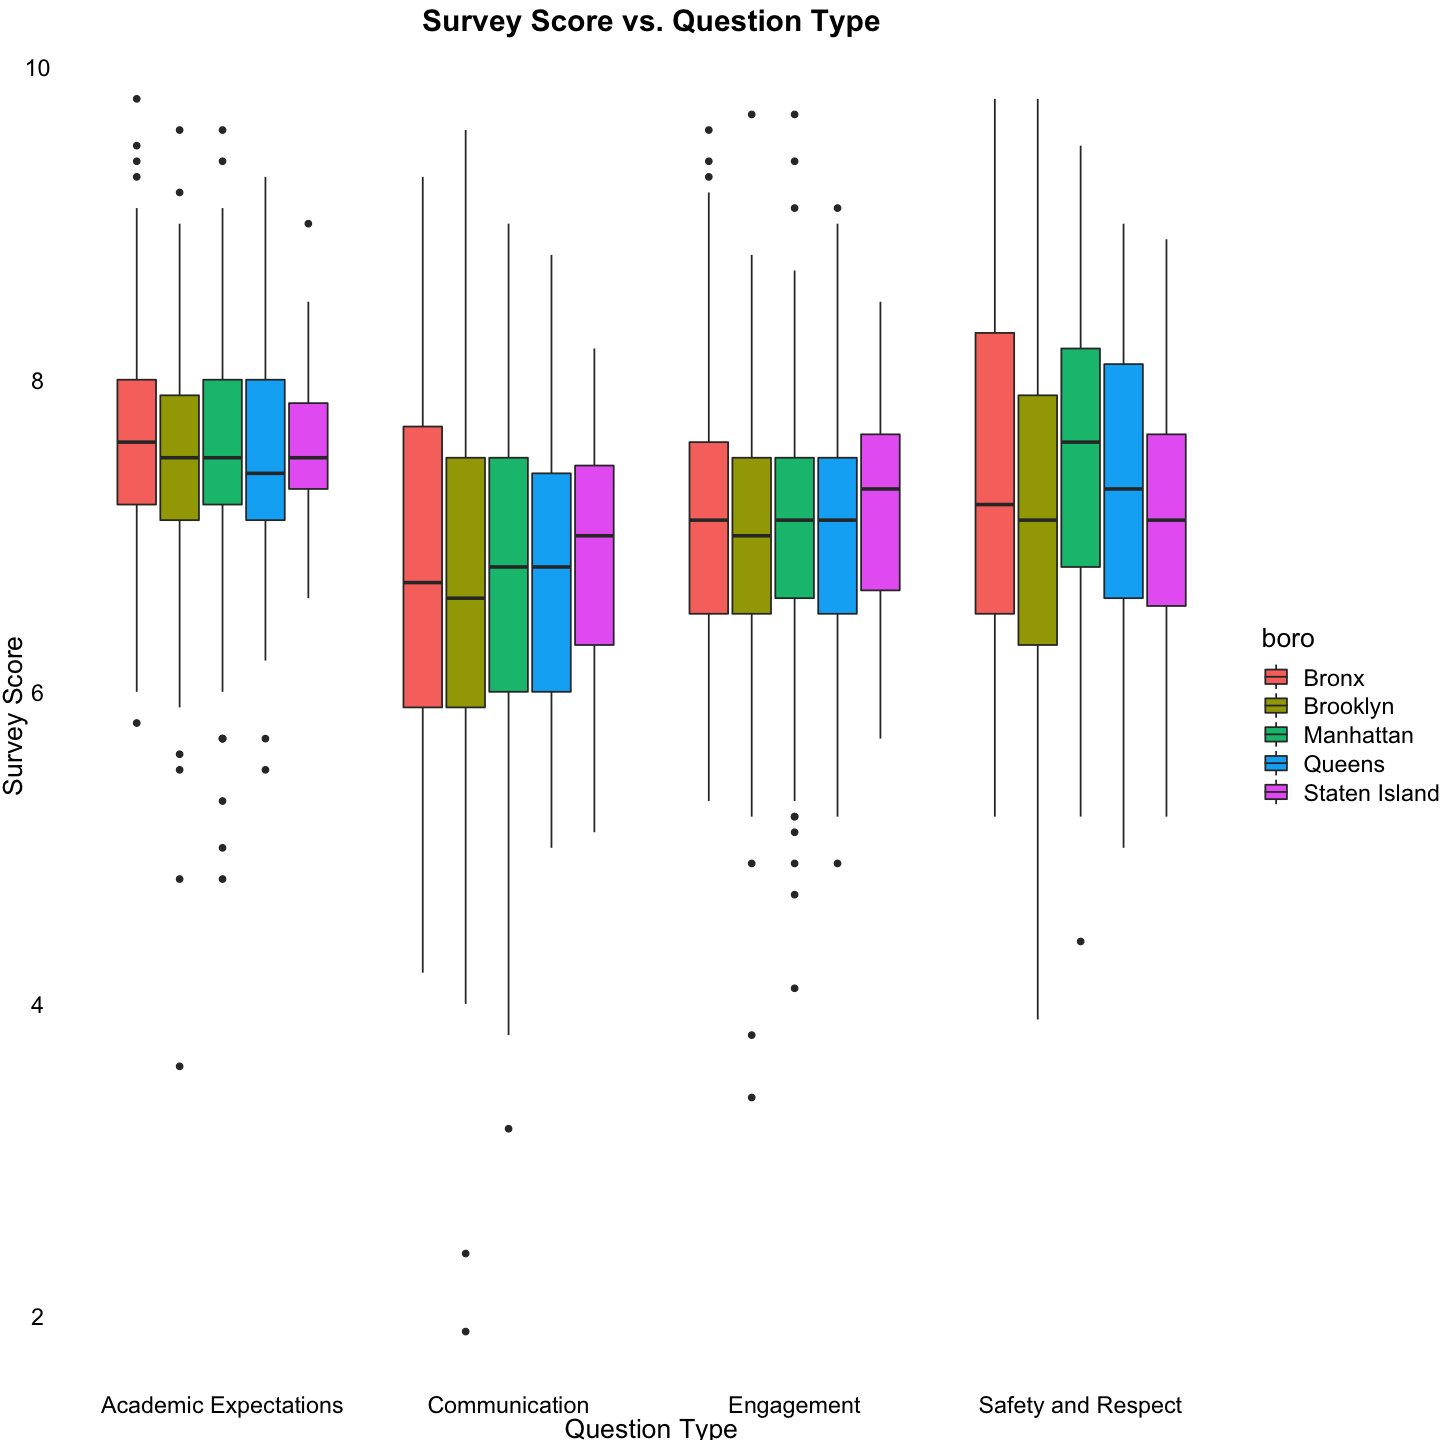

In [26]:
combined_survey_long %>%
  filter(!is.na(boro) & responder != "Total") %>%
  ggplot(aes(x = question, y = survey_scores_value, fill = boro)) +
  geom_boxplot() +
  labs(
    title = "Survey Score vs. Question Type",
    x = "Question Type",
    y = "Survey Score"
  )

Generally, those boroughs don't have huge differences, but we can still find some trends:

* Brooklyn's scores are spread out while Staten Island's scores are compact, it might because Brooklyn is the most populated NYC borough while Staten Island is the least populated.
* The lowest scores are always from Brooklyn. 
* Manhattan has relatively high scores in Safety and Respect.
* Staten Island has relatively high scores in Engagement.

#### Gender

Secondly, let check gender, since the sum of `female_per` and `male_per` is 100%, we can analyze either one and the plot will be symmetry. Here we choose `female_per`:

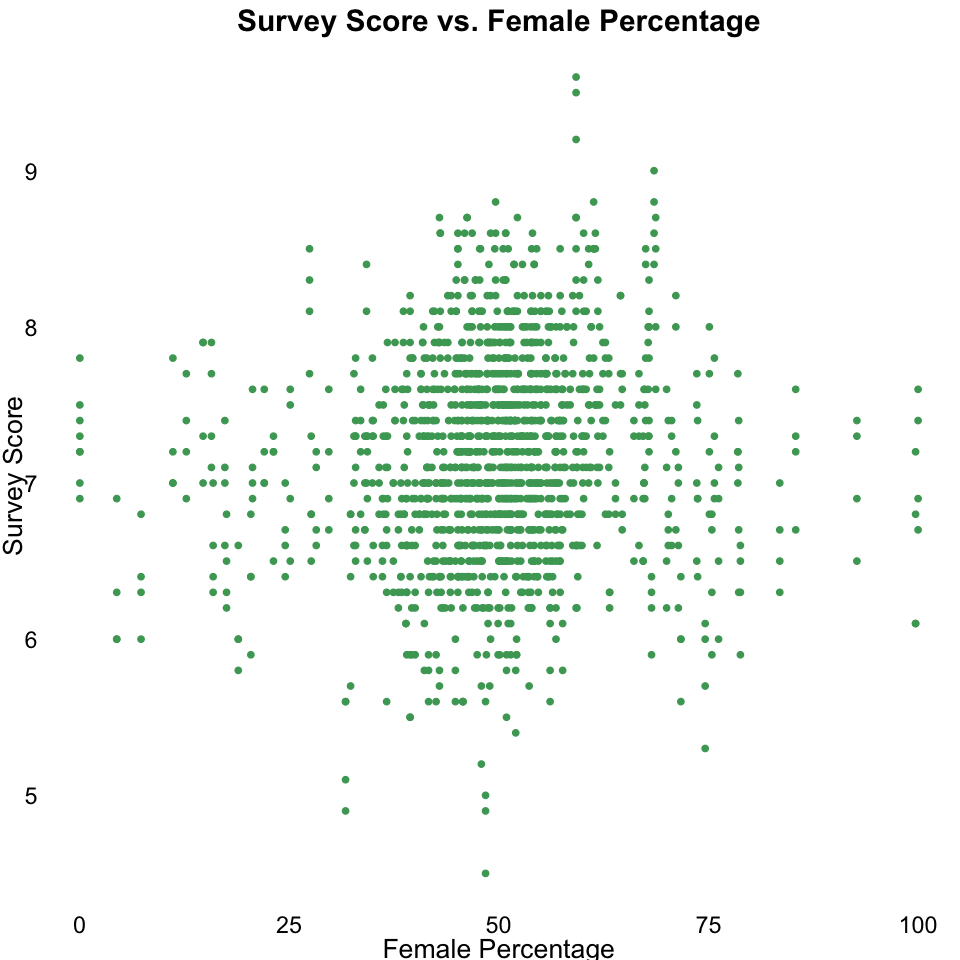

In [27]:
options(repr.plot.width = 8, repr.plot.height = 8)

combined_survey_long %>%
  filter(responder == "Total", !is.na(female_per)) %>%
  ggplot(aes(x = female_per, y = survey_scores_value)) +
  geom_point(color = "#4aa564") +
  labs(
    title = "Survey Score vs. Female Percentage",
    x = "Female Percentage",
    y = "Survey Score"
  )

Above plot doesn't show any interesting relationship between female percentage and survey scores, but it might because all points of 4 questions are mixed, let's separate them:

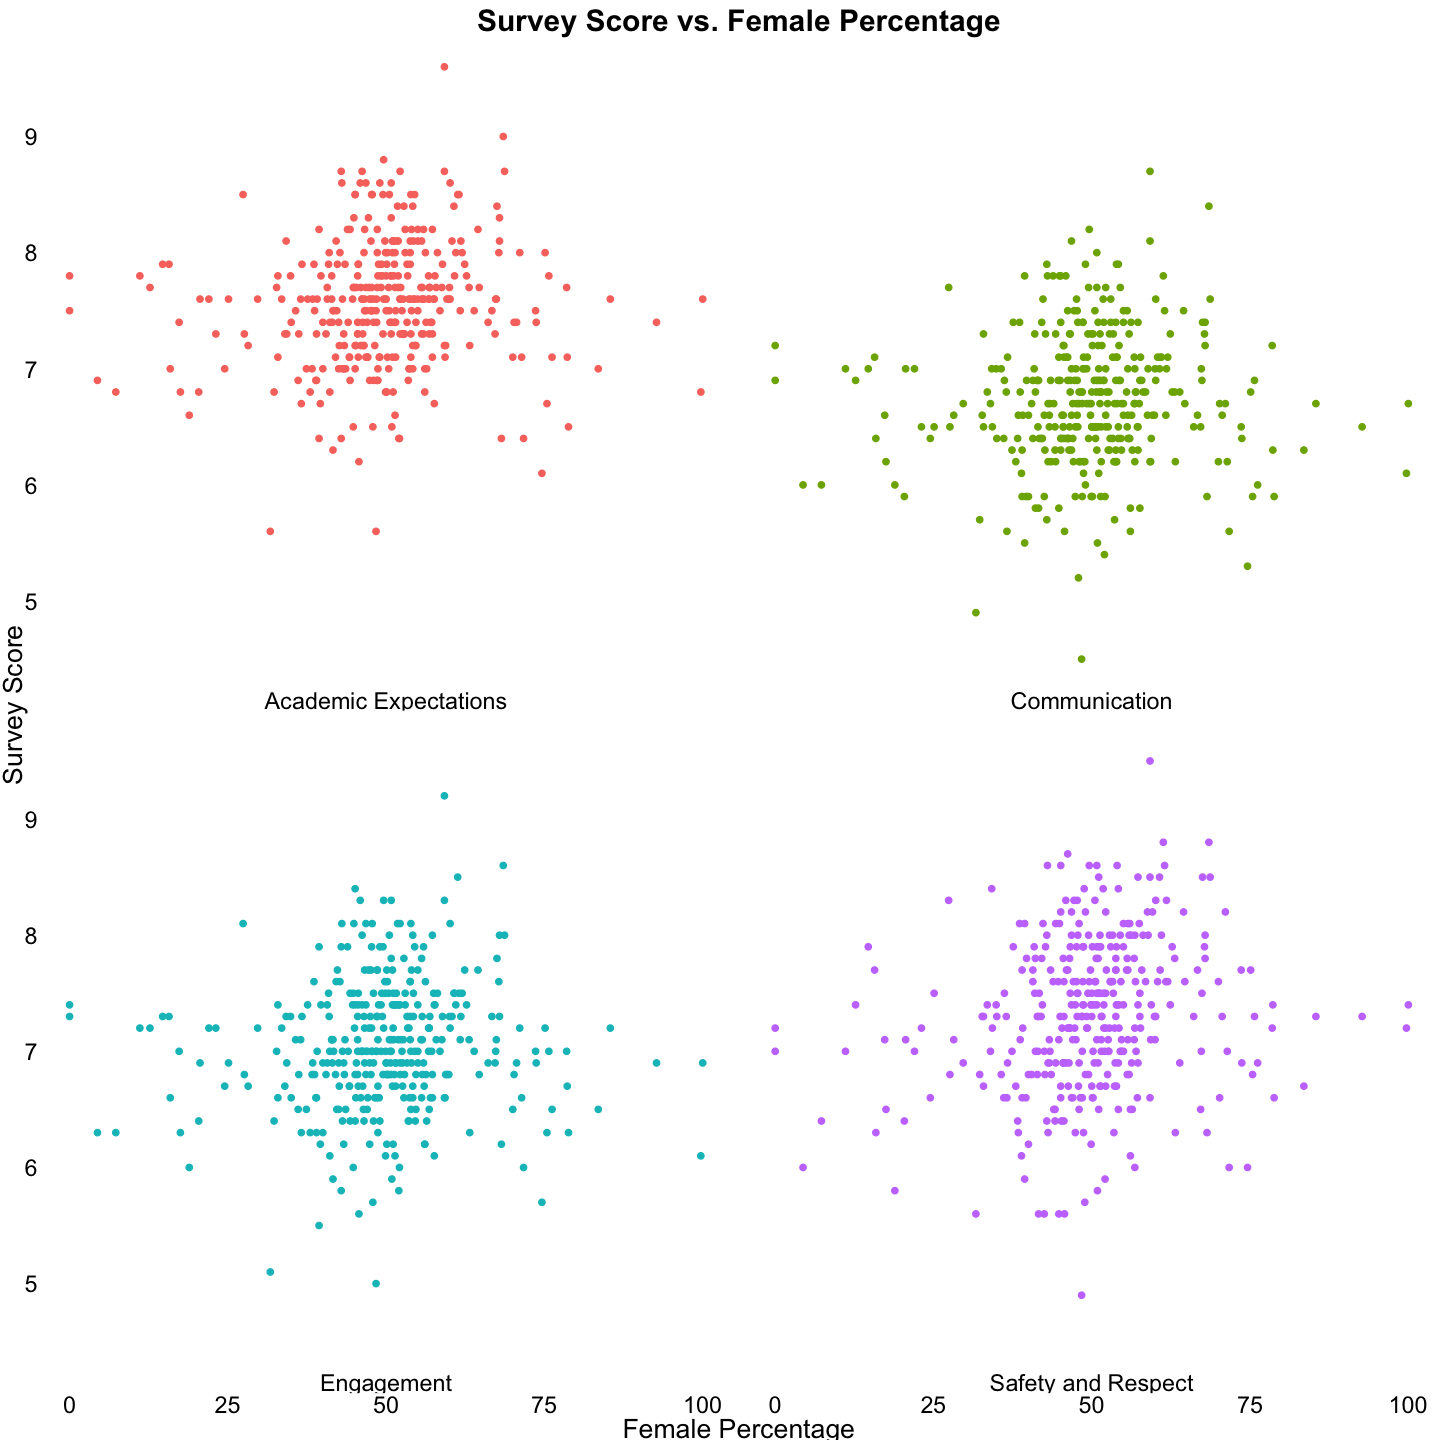

In [28]:
options(repr.plot.width = 12, repr.plot.height = 12)

combined_survey_long %>%
  filter(responder == "Total", !is.na(female_per)) %>%
  ggplot(aes(x = female_per, y = survey_scores_value, color = question)) +
  geom_point() +
  facet_wrap(
    vars(question),
    strip.position = "bottom"
  ) +
  theme(legend.position = "none") +
  labs(
    title = "Survey Score vs. Female Percentage",
    x = "Female Percentage",
    y = "Survey Score"
  )

Still nothing obvious, need to double check by computing its correlation coefficient:

In [29]:
cor_df <- combined_survey_long %>%
  filter(responder == "Total") %>% 
  select(female_per, survey_scores_value, question)

for (x in unique(cor_df$question)) {
  df <- cor_df %>% 
    filter(question == x)

  gender_question_cor <- round(cor(df$female_per, df$survey_scores_value, use = "complete.obs"), 3)
  print(paste(x, ": ", gender_question_cor))
}

[1] "Safety and Respect :  0.182"
[1] "Communication :  0.039"
[1] "Engagement :  0.068"
[1] "Academic Expectations :  0.098"


The largest correlation coefficient 0.182 is smaller than 0.25, we can regard it as no relationship.

## <a id="conclusion">6. Conclusion</a>

* School survey metric `saf_t_11`, `saf_s_11`, `saf_tot_11`, `aca_s_11` have weak positive relationships with SAT scores.

* Parents have highest satisfaction, generally, most students have lower satisfaction than teachers. While most teachers' satisfaction are in between, a few teachers have least satisfaction.

* People who have the most satisfaction and who have the least satisfaction are all from Brooklyn.

* Gender percentage has no influence on satisfaction.